In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [33]:
data = pd.DataFrame({'y': [6, 8, 12, 14, 14, 15, 17, 22, 24, 23],'x': [2, 5, 4, 3, 4, 6, 7, 5, 8, 9]})

In [34]:
data

,y,x
0,6,2
1,8,5
2,12,4
3,14,3
4,14,4
5,15,6
6,17,7
7,22,5
8,24,8
9,23,9


In [35]:
kf = KFold(n_splits=2)

In [36]:
X = data['x']
Y = data['y']  

In [45]:
X = X.values.reshape(-1,1)
X

array([[2],
       [5],
       [4],
       [3],
       [4],
       [6],
       [7],
       [5],
       [8],
       [9]], dtype=int64)

In [46]:
Y

0     6
1     8
2    12
3    14
4    14
5    15
6    17
7    22
8    24
9    23
Name: y, dtype: int64

In [47]:
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

TRAIN: [5 6 7 8 9] TEST: [0 1 2 3 4]
TRAIN: [0 1 2 3 4] TEST: [5 6 7 8 9]


In [48]:
X_train

array([[2],
       [5],
       [4],
       [3],
       [4]], dtype=int64)

In [49]:
Y_train

0     6
1     8
2    12
3    14
4    14
Name: y, dtype: int64

In [43]:
model = LinearRegression()

In [50]:
model.fit(X_train,Y_train)

LinearRegression()

In [51]:
Ypred = model.predict(X_test)

In [52]:
from sklearn.metrics import mean_squared_error

In [54]:
mean_squared_error(Y_test,Ypred)

60.120710059171586

In [56]:
print("Test R squared", 1 - mean_squared_error(Y_test,Ypred) / mean_squared_error(Y_test, [Y_test.mean()]*Y_test.shape[0]))

Test R squared -3.7866807371951907


# New

In [57]:
from sklearn.datasets import load_boston
from sklearn.linear_model import RidgeCV

In [64]:
boston = load_boston()

In [66]:
boston_features = pd.DataFrame(boston.data,columns=boston.feature_names)

In [67]:
X = boston_features['RM'].values.reshape(-1,1)
Y = boston.target

In [68]:
X

array([[6.575],
       [6.421],
       [7.185],
       [6.998],
       [7.147],
       [6.43 ],
       [6.012],
       [6.172],
       [5.631],
       [6.004],
       [6.377],
       [6.009],
       [5.889],
       [5.949],
       [6.096],
       [5.834],
       [5.935],
       [5.99 ],
       [5.456],
       [5.727],
       [5.57 ],
       [5.965],
       [6.142],
       [5.813],
       [5.924],
       [5.599],
       [5.813],
       [6.047],
       [6.495],
       [6.674],
       [5.713],
       [6.072],
       [5.95 ],
       [5.701],
       [6.096],
       [5.933],
       [5.841],
       [5.85 ],
       [5.966],
       [6.595],
       [7.024],
       [6.77 ],
       [6.169],
       [6.211],
       [6.069],
       [5.682],
       [5.786],
       [6.03 ],
       [5.399],
       [5.602],
       [5.963],
       [6.115],
       [6.511],
       [5.998],
       [5.888],
       [7.249],
       [6.383],
       [6.816],
       [6.145],
       [5.927],
       [5.741],
       [5.966],
       [

In [69]:
Y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

Text(0.5, 1.0, 'boston house price')

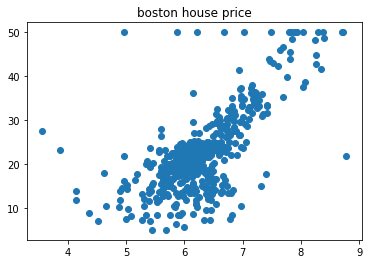

In [70]:
plt.scatter(X,Y)
plt.title('boston house price')

{'whiskers': [<matplotlib.lines.Line2D at 0x270972cbd60>,
 'caps': [<matplotlib.lines.Line2D at 0x270972dd400>,
 'boxes': [<matplotlib.lines.Line2D at 0x270972cb910>],
 'medians': [<matplotlib.lines.Line2D at 0x270972ddb20>],
 'fliers': [<matplotlib.lines.Line2D at 0x270972ddeb0>],
 'means': []}

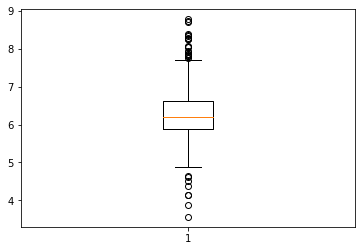

In [71]:
plt.boxplot(X)

{'whiskers': [<matplotlib.lines.Line2D at 0x2709733dac0>,
 'caps': [<matplotlib.lines.Line2D at 0x2709734b220>,
 'boxes': [<matplotlib.lines.Line2D at 0x2709733d730>],
 'medians': [<matplotlib.lines.Line2D at 0x2709734b940>],
 'fliers': [<matplotlib.lines.Line2D at 0x2709734bcd0>],
 'means': []}

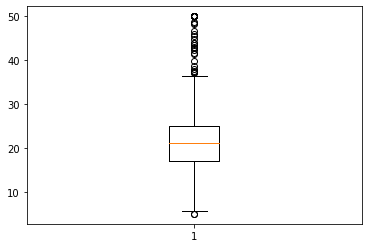

In [72]:
plt.boxplot(Y)

(array([  2.,   4.,  14.,  45., 177., 151.,  69.,  22.,  13.,   9.]),
 array([3.561 , 4.0829, 4.6048, 5.1267, 5.6486, 6.1705, 6.6924, 7.2143,
        7.7362, 8.2581, 8.78  ]),
 <BarContainer object of 10 artists>)

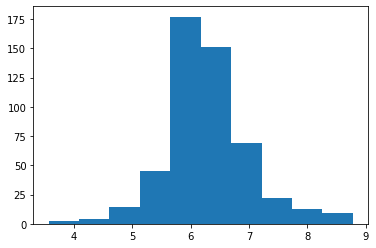

In [73]:
plt.hist(X)

(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <BarContainer object of 10 artists>)

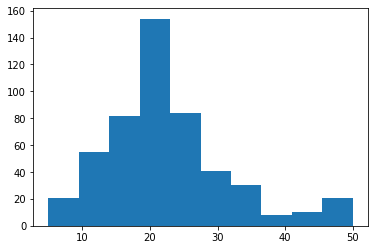

In [74]:
plt.hist(Y)

In [75]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=100,test_size=0.3) 